<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte do Trabalho de Conclusão de Curso do Bacharelado em Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [1]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# # Spark Session
# from pyspark.sql import SparkSession, Row 
# #from pyspark.sql.functions import * as F
# import pyspark.sql.functions as F
# spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. situacao_do_emprestimo: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. qt_parcelas: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grau_de_emprestimo: Grau de empréstimo atribuído (IMPORTANTE)

> 3. subclasse_de_emprestimo: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. produto_de_credito: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. valor_emprestimo_solicitado: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. taxa_de_juros: Taxa de juros do empréstimo (IMPORTANTE)

> 7. data_financiamento_emprestimo: Data em que o cliente pretende pagar o empréstimo financiado (IMPORTANTE)

> 8. produto_disponivel_publicamente: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. plano_de_pagamento: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. tipo_de_concessao_do_credor: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. pagamento_mensal: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em qt_parcelasos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

> 12. qt_meses_financiamento_emprestimo: Quantidade de meses de o financiamento do empréstimo

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. cargo_cliente: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. qt_anos_mesmo_emprego: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. status_propriedade_residencial: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. renda_comprovada: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. qt_incidencias_inadimplencia_vencidas_30dias: O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. faturamento_anual: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. estado: Estado do Cliente (IMPORTANTE)

 > 8. limite_total_produtos_credito: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. limite_total_rotativos: Limite de rotativos total (IMPORTANTE)
 
 > 10. limite_rotativos_utilizado: Limite de rotativos utilizado (IMPORTANTE)

 > 11. taxa_utilizacao_limite_rotativos: Taxa de utilização de Limite de rotativos [limite_rotativos_utilizado/limite_total_rotativos] (IMPORTANTE)

 > 12. qt_produtos_credito_contratados_atualmente: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. qt_registros_publicos_depreciativos: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. qt_consultas_credito_6meses: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. data_contratacao_primeiro_produto_credito_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. qt_meses_desde_ultimo_registro_publico: Número de meses desde o último registro público (IMPORTANTE)

 > 18. qt_meses_classificacao_mais_recente_90dias: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. qt_meses_ultima_inadimplencia: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [2]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url'], axis = 1)
df = df[[
    "loan_status", "acc_now_delinq", "term", "grade", "sub_grade", "purpose", "loan_amnt", "int_rate", "issue_d", "policy_code", "pymnt_plan",
    "initial_list_status", "installment", "emp_title", "emp_length", "home_ownership", "verification_status", "delinq_2yrs", 
    "annual_inc", "addr_state", "tot_cur_bal", "total_rev_hi_lim", "revol_bal", "revol_util", "open_acc", "total_acc", "pub_rec",
    "inq_last_6mths", "earliest_cr_line", "mths_since_last_record", "mths_since_last_major_derog", "mths_since_last_delinq"
]]

df.rename(
    {
        "loan_status": "situacao_do_emprestimo",
        "acc_now_delinq": "qt_contas_inadimplentes_outras_instituicoes",
        "term" : "qt_parcelas",
        "grade" : "grau_de_emprestimo",
        "sub_grade" : "subclasse_de_emprestimo",
        "purpose" : "produto_de_credito",
        "loan_amnt" : "valor_emprestimo_solicitado",
        "int_rate" : "taxa_de_juros",
        "issue_d" : "data_financiamento_emprestimo",
        "policy_code" : "produto_disponivel_publicamente",
        "pymnt_plan" : "plano_de_pagamento",
        "initial_list_status" : "tipo_de_concessao_do_credor",
        "installment" : "pagamento_mensal",
        "emp_title" : "cargo_cliente",
        "emp_length" : "qt_anos_mesmo_emprego",
        "home_ownership" : "status_propriedade_residencial",
        "verification_status" : "renda_comprovada",
        "delinq_2yrs" : "qt_incidencias_inadimplencia_vencidas_30dias",
        "annual_inc" : "faturamento_anual",
        "addr_state" : "estado",
        "tot_cur_bal" : "limite_total_produtos_credito",
        "total_rev_hi_lim" : "limite_total_rotativos",
        "revol_bal" : "limite_rotativos_utilizado",
        "revol_util" : "taxa_utilizacao_limite_rotativos",
        "open_acc" : "qt_produtos_credito_contratados_atualmente",
        "total_acc" : "qt_produtos_credito_contratados_historicamente",
        "pub_rec" : "qt_registros_publicos_depreciativos",
        "inq_last_6mths" : "qt_consultas_credito_6meses",
        "earliest_cr_line" : "data_contratacao_primeiro_produto_credito",
        "mths_since_last_record" : "qt_meses_desde_ultimo_registro_publico",
        "mths_since_last_major_derog" : "qt_meses_classificacao_mais_recente_90dias",
        "mths_since_last_delinq" : "qt_meses_ultima_inadimplencia"
    },
    axis = 1,
    inplace = True
)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

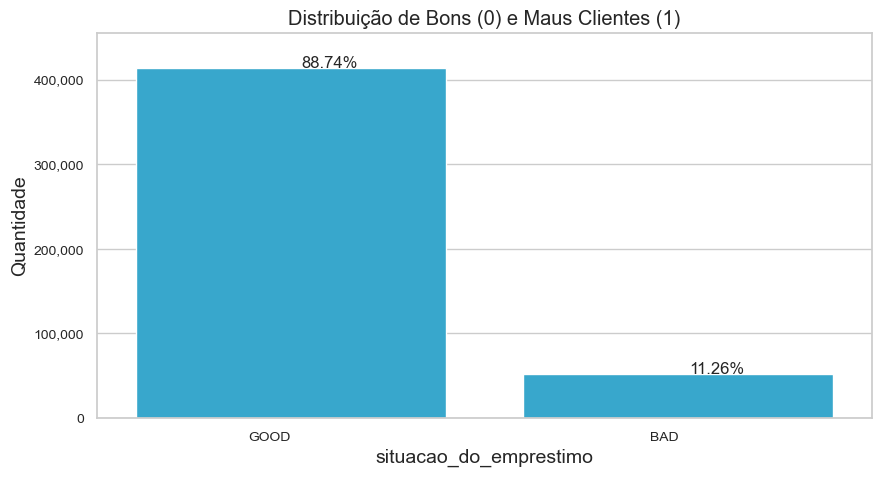

In [3]:
df['situacao_do_emprestimo'] = np.where(df['situacao_do_emprestimo'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['qt_contas_inadimplentes_outras_instituicoes'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['situacao_do_emprestimo'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [4]:
df_train = separa_treino_teste('situacao_do_emprestimo', df, 0.20)[0]
df_test = separa_treino_teste('situacao_do_emprestimo', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='red' style='font-size: 40px;'> 2. Análise De Variáveis Referentes ao Produto </font>
<hr style='border: 2px solid red;'>

### Variáveis Referentes ao Produto (VALIDADO)

> 1. qt_parcelas: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (ANALISE REALIZADA)

> 2. grau_de_emprestimo: Grau de empréstimo atribuído (ANALISE REALIZADA)

> 3. subclasse_de_emprestimo: Subclasse de empréstimo atribuído (ANALISE REALIZADA)

> 4. produto_de_credito: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (ANALISE REALIZADA)

> 5. valor_emprestimo_solicitado: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (ANALISE REALIZADA)

> 6. taxa_de_juros: Taxa de juros do empréstimo (ANALISE REALIZADA)

> 7. data_financiamento_emprestimo: Data em que o cliente pretende pagar o empréstimo financiado (ANALISE REALIZADA)

> 8. produto_disponivel_publicamente: Flag que indica Produto disponível publicamente ou não (ANALISE REALIZADA)

> 9. plano_de_pagamento: Flag que indica se um plano de pagamento foi implementado para o empréstimo 

> 10. tipo_de_concessao_do_credor: Status de listagem inicial do empréstimo. Os valores possíveis são W-F

> 11. pagamento_mensal: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em qt_parcelasos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.)

# <font color='green' style='font-size: 30px;'> 2.1) Número de Parcelas vs Target </font>
<hr style='border: 2px solid green;'>

> 1. Em relação ao número de parcelas, nota-se que graficamente elas aparentam ter relação com a PD

> 2. Para provar estatísticamente que há relação significativa, aplicou-se um Teste Chi-Quadrado com as seguintes hipóteses:

- H0: Não há associação entre as variáveis
- H1: Há associação entre as variáveis

> 3. Como o p-value < 0.05, não há evidências suficientes para aceitar H0, portanto, rejeita-se H0 e conclui-se que há associação significativa entre o número de parcelas escolhida pelo cliente e a PD

> 4. Para fins explicativos, aplicou-se também um calculo de Weight of Evidence. WOE é uma métrica usada em análises de crédito para avaliar a força da relação entre uma variável categórica (como o qt_parcelaso do empréstimo) e o risco de inadimplência. Valores positivos de WOE indicam que a categoria está associada a um maior risco de inadimplência, enquanto valores negativos indicam menor risco. No caso apresentado, "36 months" tem um valor de -0.13, o que significa que essa categoria está ligeiramente associada a um menor risco em comparação com "60 months", que tem um valor de 0.30, indicando um risco um pouco maior.

Pelo Teste Qui-Quadrado, há associação significativa entre qt_parcelas e situacao_do_emprestimo.


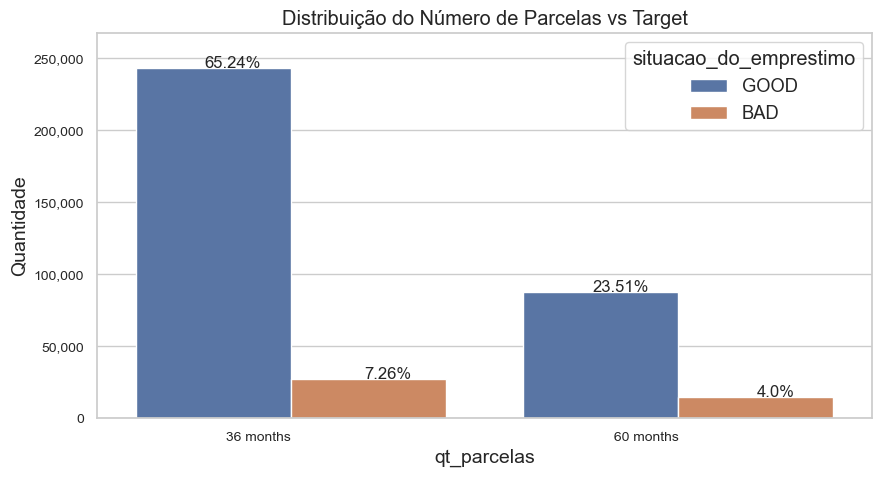

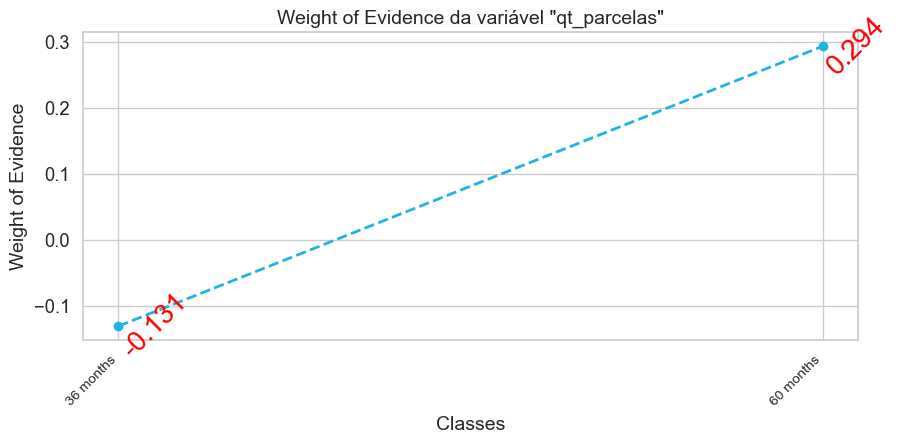

In [5]:
teste_hipotese_duas_variaveis_categoricas(df_train, 'qt_parcelas', 'situacao_do_emprestimo')
plota_barras(['qt_parcelas'], 'situacao_do_emprestimo', df_train, 1, 1, 'Distribuição do Número de Parcelas vs Target', 0)
woe(df_train, 'qt_parcelas', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.2) Graus de Empréstimo vs Target </font>
<hr style='border: 2px solid green;'>

> 1. Existem diversos tipo de empréstimo, portanto, a depender do produto contratado a PD pode mudar

> 2. Embora estejam expressas em siglas tornando-se impossível interpretá-las, nota-se que o grau possuI associação com a target e alguns graus relacionam-se de forma a aumentar ou diminuir a PD.

Pelo Teste Qui-Quadrado, há associação significativa entre grau_de_emprestimo e situacao_do_emprestimo.


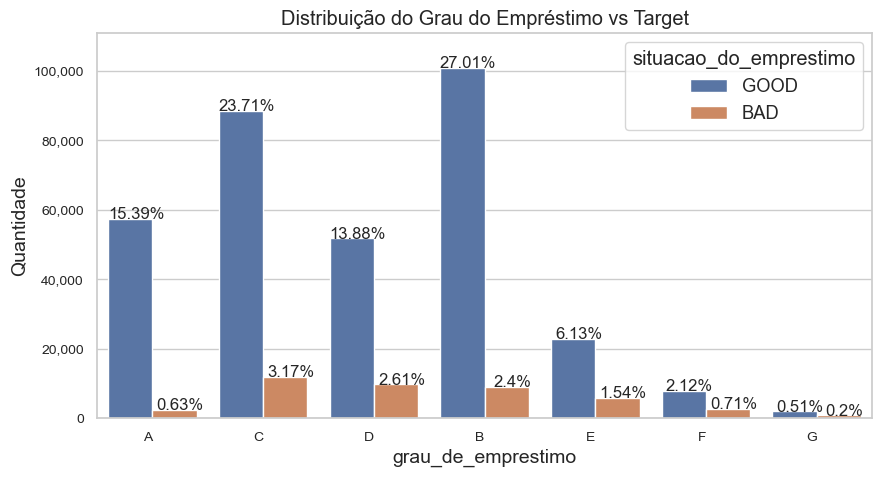

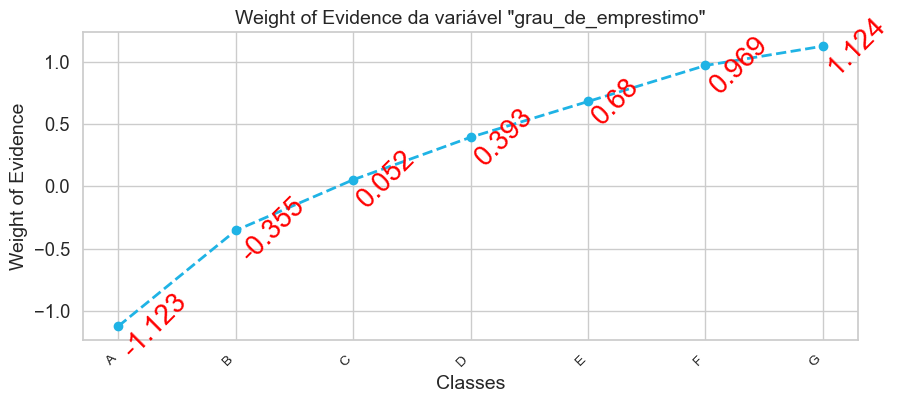

In [6]:
teste_hipotese_duas_variaveis_categoricas(df_train, 'grau_de_emprestimo', 'situacao_do_emprestimo')
plota_barras(['grau_de_emprestimo'], 'situacao_do_emprestimo', df_train, 1, 1, 'Distribuição do Grau do Empréstimo vs Target', 0)
woe(df_train, 'grau_de_emprestimo', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.3) Subclasse de Empréstimo vs Target </font>
<hr style='border: 2px solid green;'>

> 1. Existem diversos tipo de empréstimo, portanto, a depender do produto contratado a PD pode mudar

> 2. Embora estejam expressas em siglas tornando-se impossível interpretá-las, nota-se que a subclasse possuI associação com a target e alguMAS subclasses relacionam-se de forma a aumentar ou diminuir a PD.

Pelo Teste Qui-Quadrado, há associação significativa entre subclasse_de_emprestimo e situacao_do_emprestimo.


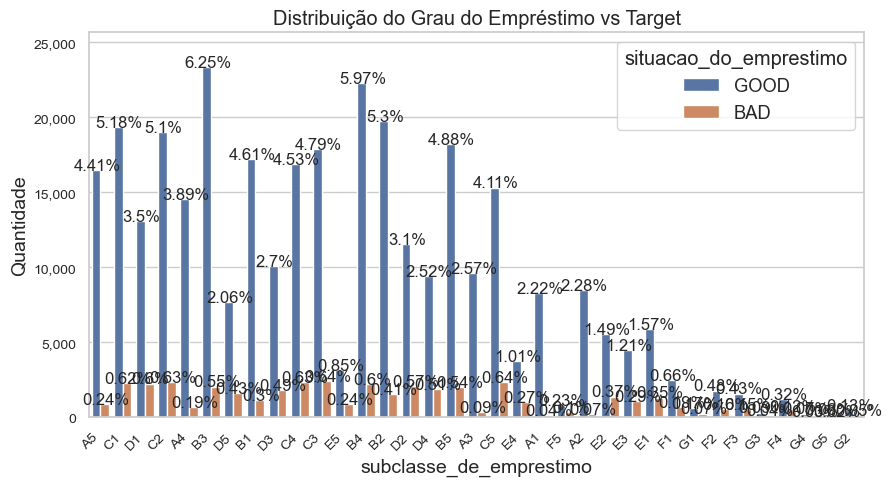

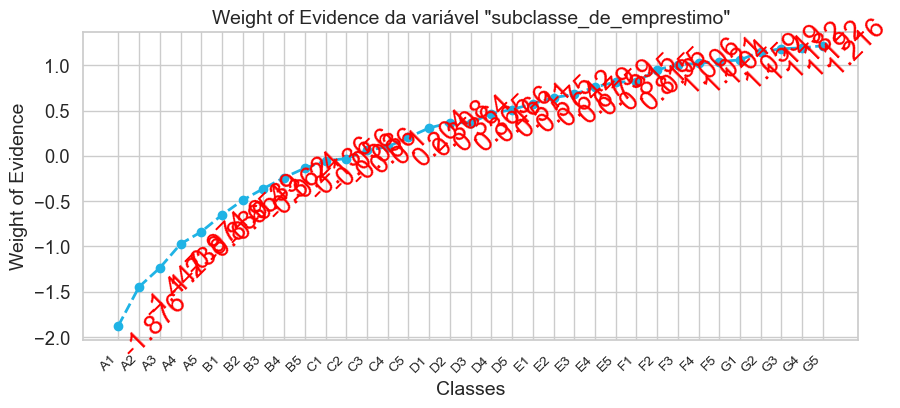

In [7]:
teste_hipotese_duas_variaveis_categoricas(df_train, 'subclasse_de_emprestimo', 'situacao_do_emprestimo')
plota_barras(['subclasse_de_emprestimo'], 'situacao_do_emprestimo', df_train, 1, 1, 'Distribuição do Grau do Empréstimo vs Target', 45)
woe(df_train, 'subclasse_de_emprestimo', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.4) Propósito do Crédito vs Target </font>
<hr style='border: 2px solid green;'>

> 1. Pelo Teste do Chi-Quadrado, novamente nota-se associação entre as variáveis

> 2. Variáveis como debt_consolidation, education, credit_card, wedding demonstram ser motivos menos relacionados a inadimplência

> 3. Já as variáveis home_improvement, major_purchase, small_business, vacation, house, car, moving, renewable_energy, medical tendem a oferecer maior risco.

Pelo Teste Qui-Quadrado, há associação significativa entre produto_de_credito e situacao_do_emprestimo.


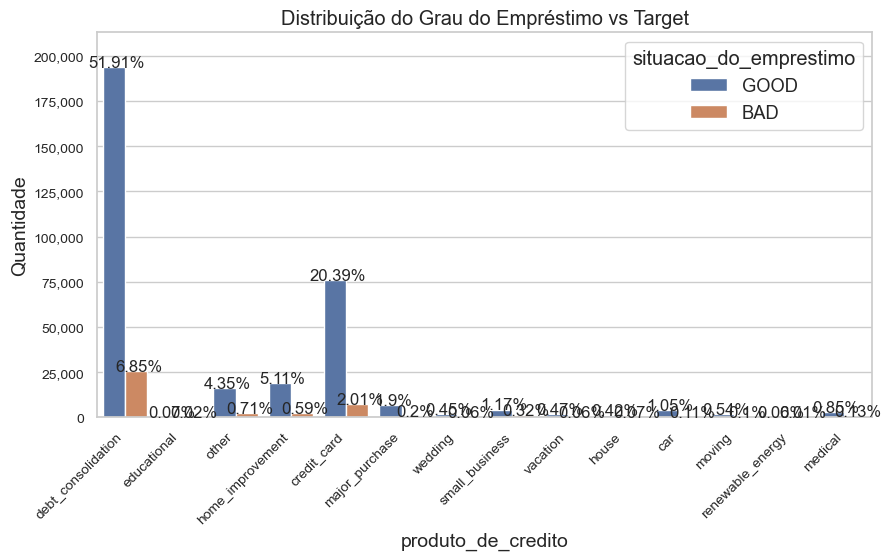

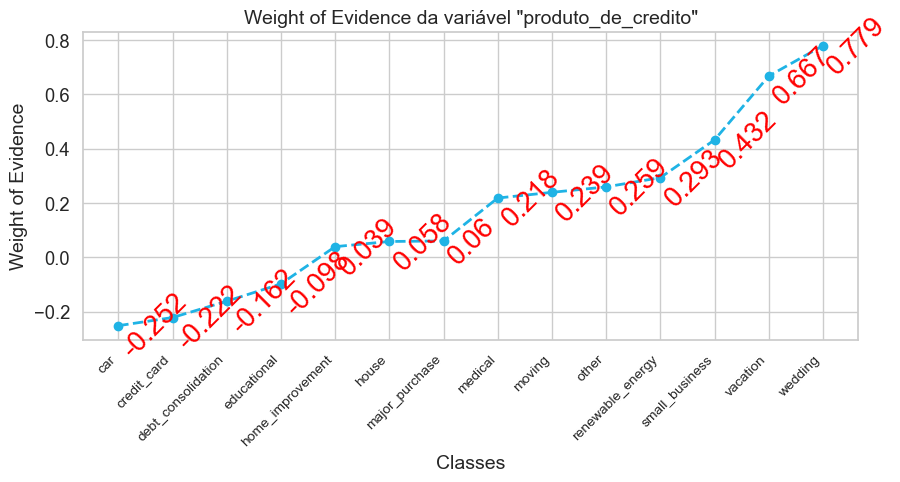

In [8]:
teste_hipotese_duas_variaveis_categoricas(df_train, 'produto_de_credito', 'situacao_do_emprestimo')
plota_barras(['produto_de_credito'], 'situacao_do_emprestimo', df_train, 1, 1, 'Distribuição do Grau do Empréstimo vs Target', 45)
woe(df_train, 'produto_de_credito', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.5) Valor de Crédito vs Target</font>
<hr style='border: 2px solid green;'>

> 1. A distribuição do valor de crédito aparentemente não é um fator decisivo para a previsão da inadimplência.

> 2. Da mesma forma que contratos de baixo valor estão sucetíveis à risco, contratos de alto valor também.

> 3. Além disso, nota-se que não há valores exorbitantes, portanto, a tendência é que o valor de crédito solicitado de fato não tenha grande poder de discriminação.

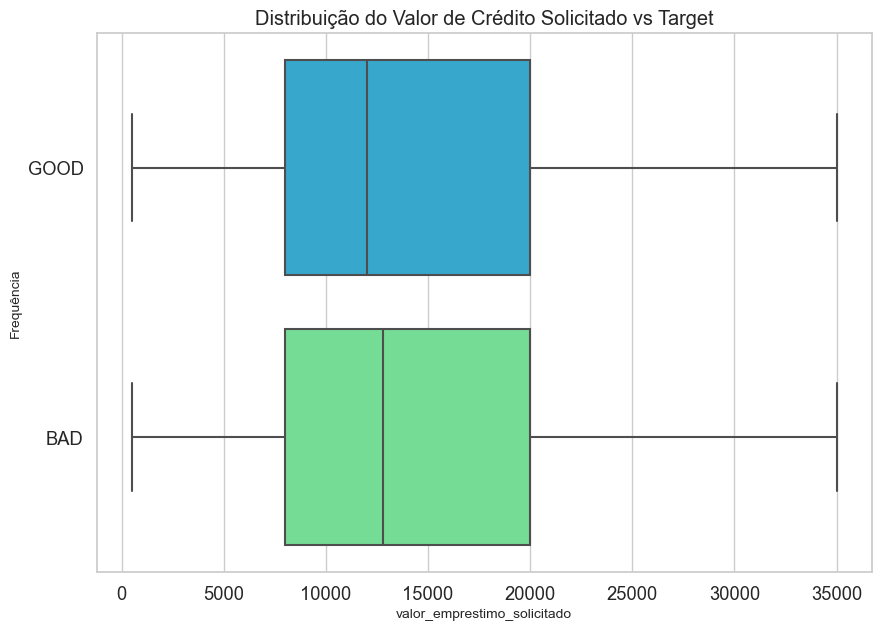

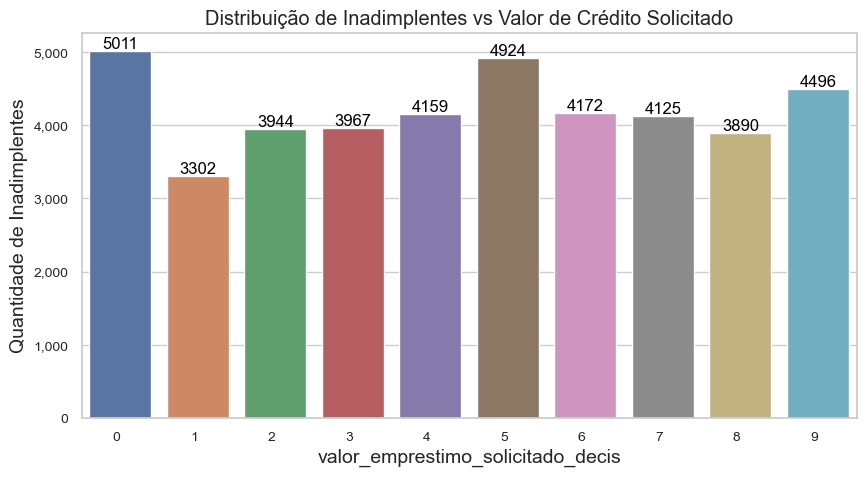

In [9]:
df_aux = df_train[['situacao_do_emprestimo', 'valor_emprestimo_solicitado']].copy()
df_aux['valor_emprestimo_solicitado_decis'] = transform_to_deciles(df_train, 'valor_emprestimo_solicitado').fillna(0)
plota_boxplot(['valor_emprestimo_solicitado'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição do Valor de Crédito Solicitado vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('valor_emprestimo_solicitado_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('valor_emprestimo_solicitado_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'valor_emprestimo_solicitado_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'valor_emprestimo_solicitado_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Valor de Crédito Solicitado')


# <font color='green' style='font-size: 30px;'> 2.6) Valor da Taxa de Juros vs Target</font>
<hr style='border: 2px solid green;'>

> 1. A distribuição da taxa de juros mostra claramente que clientes com maiores taxas tendem a maior inadimplência.

> 2. Isso pode ocorrer pois deqt_parcelasinados tipos de produtos de crédito tem taxas de juros específicas.

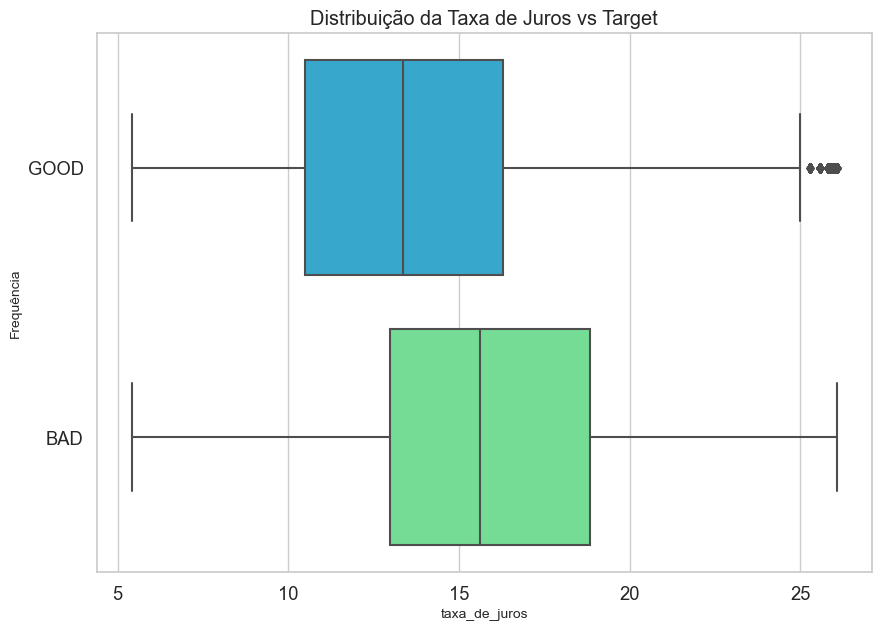

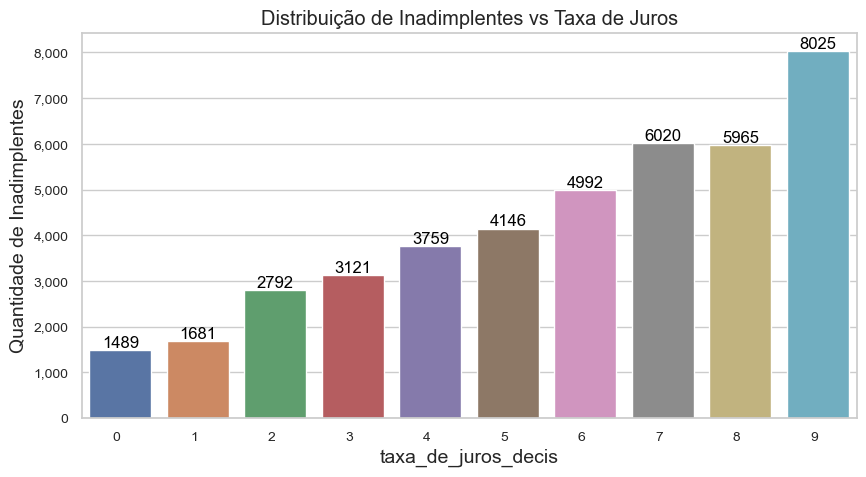

In [10]:
df_aux = df_train[['situacao_do_emprestimo', 'taxa_de_juros']].copy()
df_aux['taxa_de_juros_decis'] = transform_to_deciles(df_train, 'taxa_de_juros').fillna(0)
plota_boxplot(['taxa_de_juros'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição da Taxa de Juros vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('taxa_de_juros_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('taxa_de_juros_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'taxa_de_juros_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'taxa_de_juros_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Juros')


# <font color='green' style='font-size: 30px;'> 2.7) Data de Financiamento do Empréstimo vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Clientes com datas de financiamento maiores tendem a ter maior risco de crédito

> 2. Isso se deve talvez pois justamente por necessitarem de mais tempo, provavelmente esses clientes possuem menor capacidade de pagamento

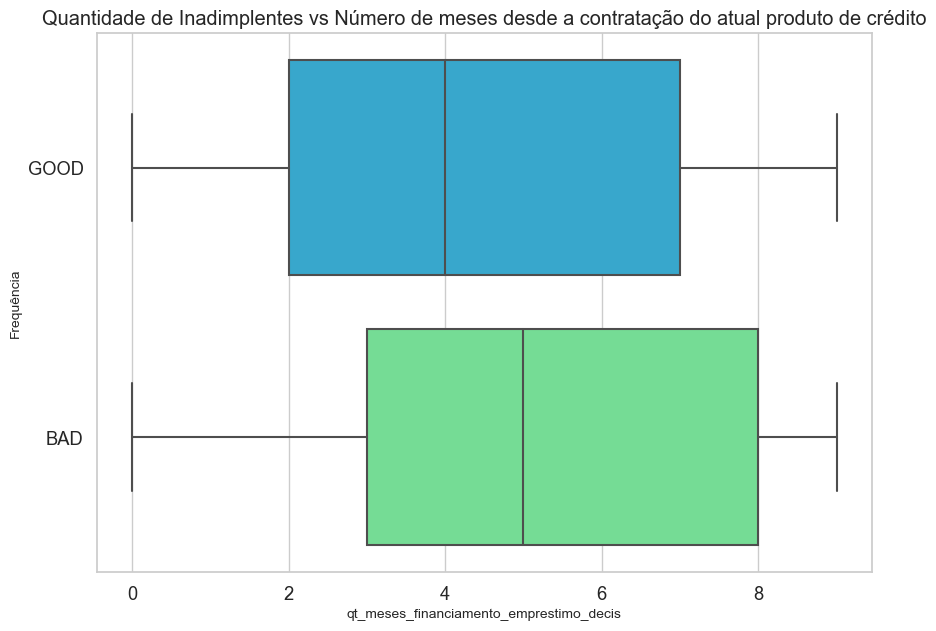

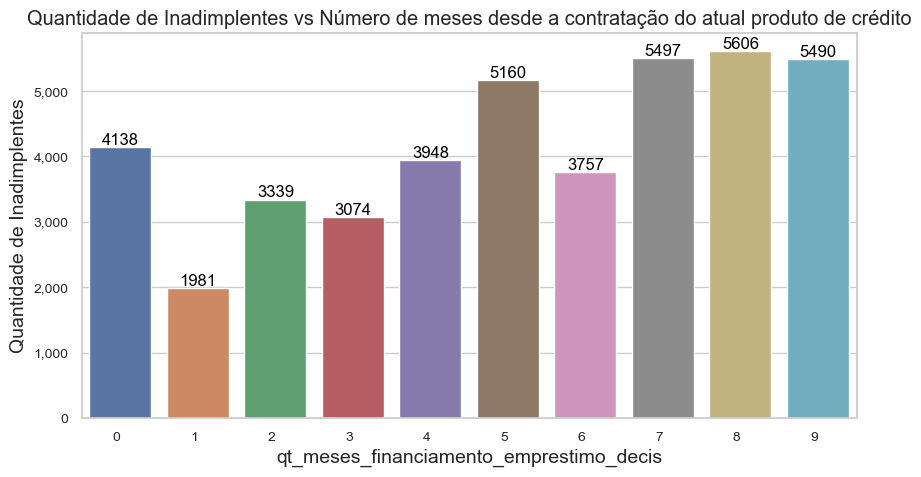

In [11]:
df_aux = df_train[['situacao_do_emprestimo', 'data_financiamento_emprestimo']].copy()
df_aux['data_financiamento_emprestimo'] = pd.to_datetime(df_aux['data_financiamento_emprestimo'], format = '%b-%y')
df_aux['qt_meses_financiamento_emprestimo'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df_aux['data_financiamento_emprestimo'])/np.timedelta64(1, 'M')))
df_aux['qt_meses_financiamento_emprestimo'] = df_aux['qt_meses_financiamento_emprestimo'].fillna(df_aux['qt_meses_financiamento_emprestimo'].median())
df_aux['qt_meses_financiamento_emprestimo'] = np.where(df_aux['qt_meses_financiamento_emprestimo'] < 0, df_aux['qt_meses_financiamento_emprestimo'].median(), df_aux['qt_meses_financiamento_emprestimo'])
df_aux['qt_meses_financiamento_emprestimo'] = df_aux['qt_meses_financiamento_emprestimo'].apply(lambda x:int(x))
df_aux['qt_meses_financiamento_emprestimo_decis'] = transform_to_deciles(df_aux, 'qt_meses_financiamento_emprestimo')
plota_boxplot(['qt_meses_financiamento_emprestimo_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a contratação do atual produto de crédito')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_meses_financiamento_emprestimo_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_meses_financiamento_emprestimo_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_meses_financiamento_emprestimo_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_meses_financiamento_emprestimo_decis', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a contratação do atual produto de crédito')

# <font color='green' style='font-size: 30px;'> 2.8) Tipo de Produto vs Target</font>
<hr style='border: 2px solid green;'>

> 1. A definição do produto disponível publicamente não é uma informação relevante

> 2. Os gráficos, o teste de hipótese e o WOE mostram que não há discriminação

Pelo Teste Qui-Quadrado, não há associação significativa entre produto_disponivel_publicamente e situacao_do_emprestimo.


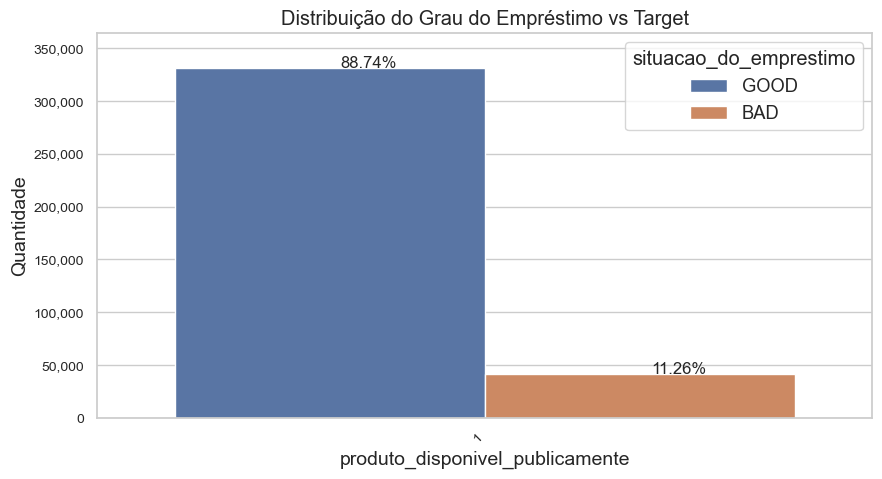

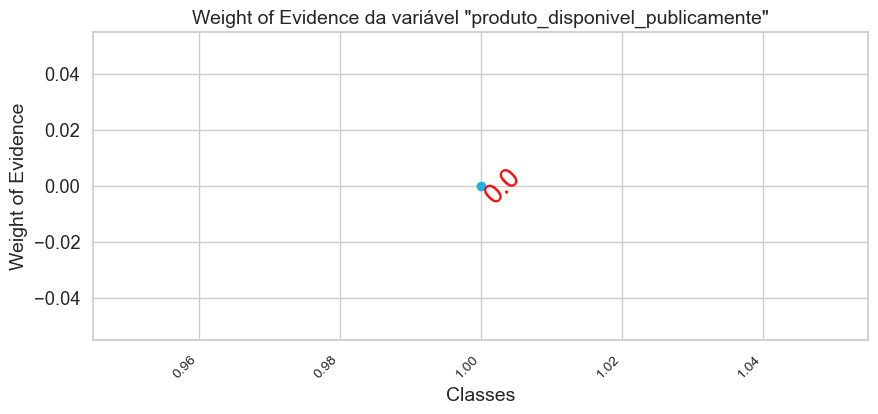

In [12]:
teste_hipotese_duas_variaveis_categoricas(df_train, 'produto_disponivel_publicamente', 'situacao_do_emprestimo')
plota_barras(['produto_disponivel_publicamente'], 'situacao_do_emprestimo', df_train, 1, 1, 'Distribuição do Grau do Empréstimo vs Target', 45)
woe(df_train, 'produto_disponivel_publicamente', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.9) Plano de Pagamento vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Nenhum cliente da base de dados fez um Plano de Pagamento

Pelo Teste Qui-Quadrado, não há associação significativa entre plano_de_pagamento e situacao_do_emprestimo.


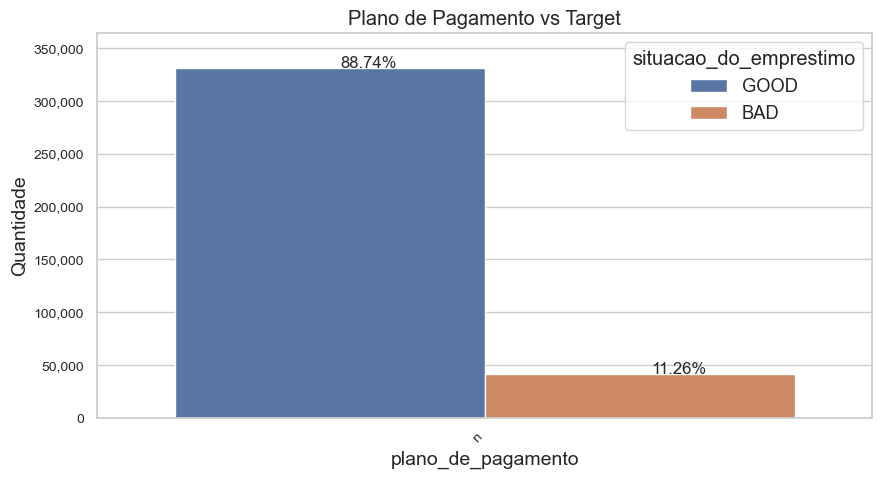

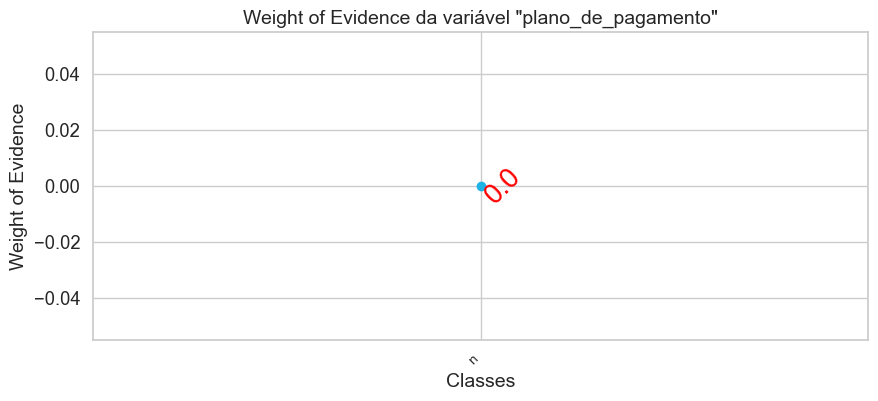

In [13]:
df_aux = df_train[['plano_de_pagamento', 'situacao_do_emprestimo']].copy()
df_aux['plano_de_pagamento'] = np.where(df_aux['plano_de_pagamento'] == 'n', 'n', 'n')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'plano_de_pagamento', 'situacao_do_emprestimo')
plota_barras(['plano_de_pagamento'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Plano de Pagamento vs Target', 45)
woe(df_aux, 'plano_de_pagamento', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.10) Listagem Inicial do Empréstimo vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Clientes com a listagem "w" possuem menor risco de crédito em relação a clientes com a listagem "f"

Pelo Teste Qui-Quadrado, há associação significativa entre tipo_de_concessao_do_credor e situacao_do_emprestimo.


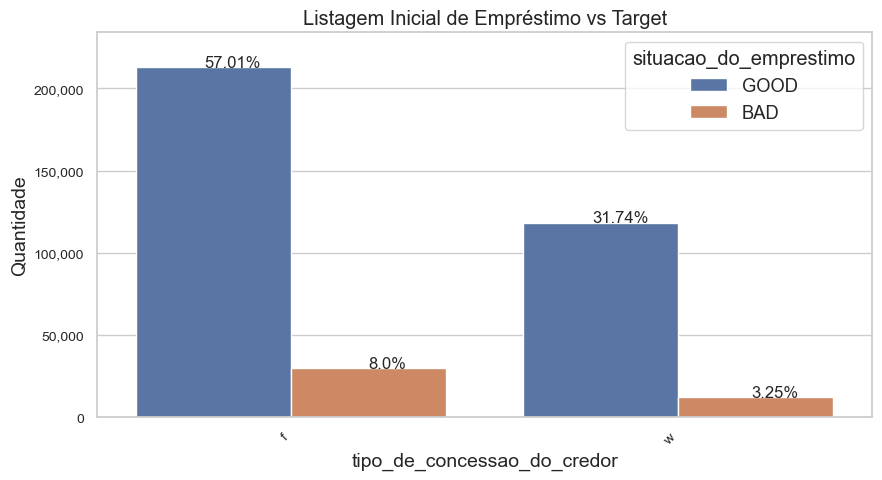

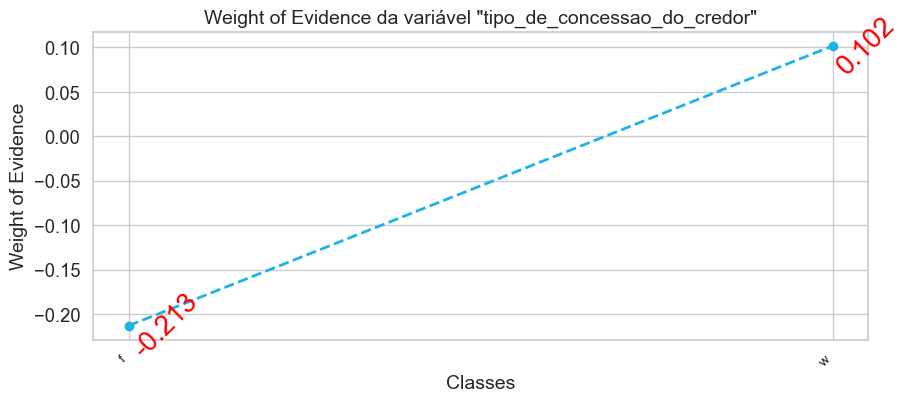

In [14]:
df_aux = df_train[['tipo_de_concessao_do_credor', 'situacao_do_emprestimo']].copy()
teste_hipotese_duas_variaveis_categoricas(df_aux, 'tipo_de_concessao_do_credor', 'situacao_do_emprestimo')
plota_barras(['tipo_de_concessao_do_credor'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Listagem Inicial de Empréstimo vs Target', 45)
woe(df_aux, 'tipo_de_concessao_do_credor', 'situacao_do_emprestimo')